In [409]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import ttest_ind

In [410]:
df= pd.read_csv(r'C:\Users\Isa\Downloads\songs_normalize.csv')

In [411]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [412]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [413]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [414]:
null_vals = df.isnull()
rows_with_null = df[null_vals.any(axis=1)]
columns_with_null = df.columns[null_vals.any()]

# Print the rows and columns with null values
print("Rows with null values:")
print(rows_with_null)
print("\nColumns with null values:")
print(columns_with_null)

Rows with null values:
Empty DataFrame
Columns: [artist, song, duration_ms, explicit, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, genre]
Index: []

Columns with null values:
Index([], dtype='object')


In [415]:
df['genre'].value_counts()

genre
pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip 

In [416]:
df.shape

(2000, 18)

In [417]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [418]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [419]:
df.duplicated().sum()

59

In [420]:
df.loc[df.duplicated()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.376000,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.362000,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.315000,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.292000,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
310,Busta Rhymes,I Know What You Want (feat. Flipmode Squad),324306,True,2002,68,0.648,0.759,6,-4.315,1,0.3060,0.014200,0.000000,0.6480,0.518,85.996,"hip hop, pop"
374,Coldplay,Clocks,307879,False,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,"rock, pop"
376,Missy Elliott,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,"hip hop, pop, R&B"
394,Daniel Bedingfield,If You're Not The One,257026,False,2002,58,0.688,0.538,10,-7.608,1,0.0292,0.504000,0.000000,0.1110,0.270,119.998,pop
431,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,5,-3.041,0,0.2680,0.688000,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"


In [421]:
df.loc[df.duplicated(subset = ['song', 'artist'])]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.37600,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.36200,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.31500,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.29200,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Jax Jones,Breathe,207629,False,2017,58,0.722,0.744,11,-5.520,0,0.0363,0.02340,0.000157,0.1430,0.686,125.985,"hip hop, pop, Dance/Electronic"
1855,Cardi B,Bodak Yellow,223712,True,2018,72,0.926,0.703,11,-6.337,0,0.1030,0.06590,0.000000,0.2310,0.485,125.022,"hip hop, pop"
1921,Travis Scott,SICKO MODE,312820,True,2018,81,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,"hip hop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [422]:
df.query("song=='lovely (with Khalid)'")

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"


In [423]:
df= df.loc[~df.duplicated(subset = ['song', 'artist'])].reset_index(drop=True).copy()

In [424]:
df.shape

(1926, 18)

#We see that the duplicates when just running the normal duplicates locating function are either a result of the
#artist having multiple songs, or some of the songs are 
#the same name
 however once we run a loc on song and artist we see there are duplicates of the same song and i decided to locate the columns that do not have the duplicates by using the ~ squiggly line and then save that to the new df and because deleting rows leads to messing up the index, we reset the index



<Axes: ylabel='Frequency'>

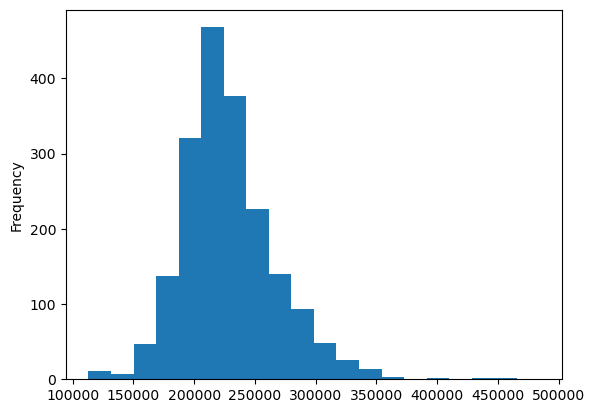

In [425]:
df['duration_ms'].plot(kind='hist',bins=20)

Text(0.5, 0, 'Duration')

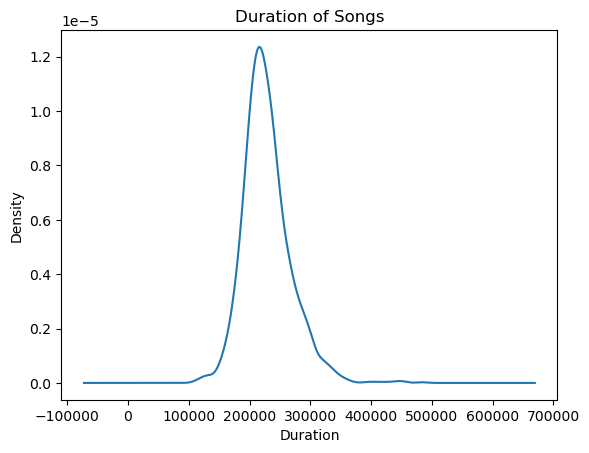

In [426]:
ay = df['duration_ms'].plot(kind='kde', title = 'Duration of Songs')
ay.set_xlabel('Duration')

In [427]:
## Feature Understanding

Text(0, 0.5, 'Count')

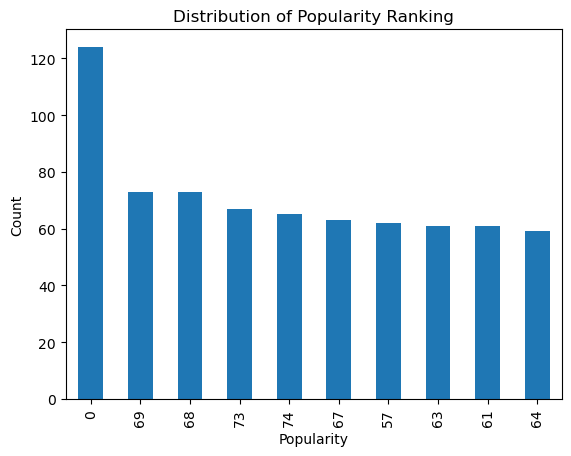

In [428]:
ax= df['popularity'].value_counts() \
.head(10)\
.plot(kind="bar", title = 'Distribution of Popularity Ranking')
ax.set_xlabel('Popularity')
ax.set_ylabel('Count')

I found this interesting but it made sense to me becasue realistically the amount of songs that go "viral" or just have a good popularity ranking is much lower than the amount of songs released that do not perform well.

In [429]:
#df =df[['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
   #    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    #   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
     #  'genre']]
#df

In [430]:
##figure out how to capitalize
#df =df[['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
   #    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    #   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
     #  'genre']].str.capitalize()
#df

In [431]:
df.duplicated().sum()

0

In [432]:
#Feature Understanding

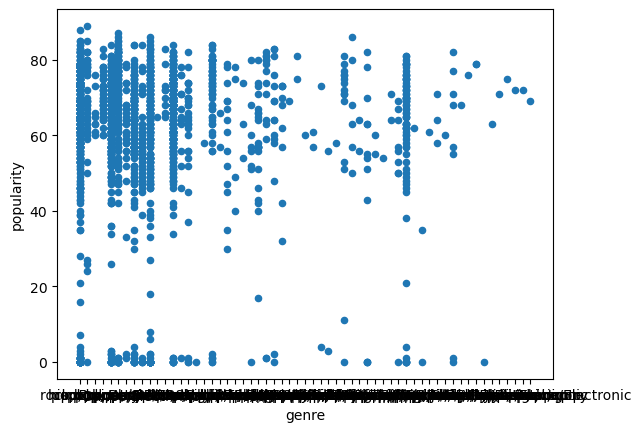

In [433]:
df.plot(kind='scatter', x= 'genre', y='popularity')
plt.show()

In [434]:
top_five_artists = df.groupby('genre').count().sort_values(by = "popularity", ascending=False)['popularity'][:5]
top_five_artists

genre
pop                      411
hip hop, pop             265
hip hop, pop, R&B        234
pop, Dance/Electronic    213
pop, R&B                 170
Name: popularity, dtype: int64

<Axes: xlabel='popularity', ylabel='genre'>

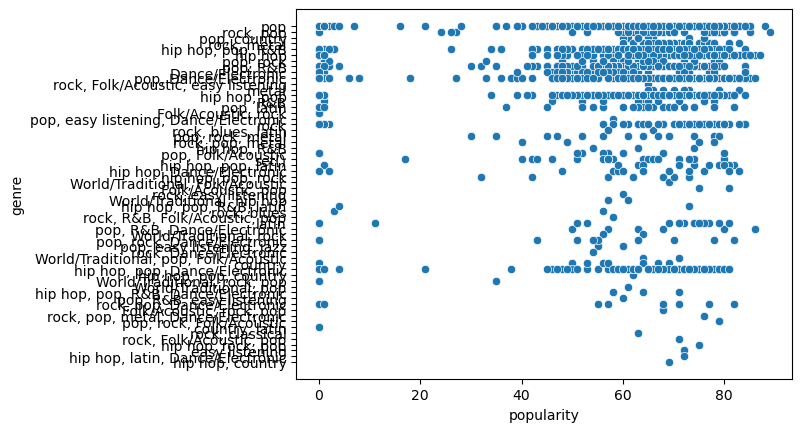

In [435]:
sns.scatterplot(x='popularity', y='genre', data=df)

In [436]:
# Separate data into two groups based on whether the song is explicit or not
explicit_songs = df[df['explicit'] == True]['popularity']
non_explicit_songs = df[df['explicit'] == False]['popularity']

# Calculate summary statistics
explicit_mean = explicit_songs.mean()
non_explicit_mean = non_explicit_songs.mean()
print("Mean of Explicit songs: {}".format(explicit_mean))
print("Mean of Non-Explicit Songs:{}".format(non_explicit_mean))



Mean of Explicit songs: 61.19887429643527
Mean of Non-Explicit Songs:59.071787508973436


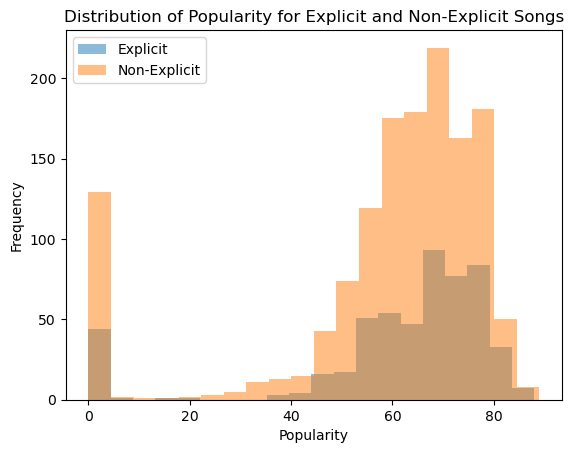

In [437]:
# Visualize the distribution of popularity
# For example, you can use histograms or box plots
fig, ax = plt.subplots()

# Plot histograms for explicit and non-explicit songs
ax.hist(explicit_songs, bins=20, alpha=0.5, label='Explicit')
ax.hist(non_explicit_songs, bins=20, alpha=0.5, label='Non-Explicit')

# Add labels and title
ax.set_xlabel('Popularity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Popularity for Explicit and Non-Explicit Songs')

# Add a legend
ax.legend()

# Show plot
plt.show()

In [438]:
# Visualize the distribution of popularity
# For example, you can use histograms or box plots

# Perform a t-test to determine if there is a significant difference
t_stat, p_value = ttest_ind(explicit_songs, non_explicit_songs)

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in popularity between explicit and non-explicit songs.")
else:
    print("There is no statistically significant difference in popularity between explicit and non-explicit songs.")

There is no statistically significant difference in popularity between explicit and non-explicit songs.


In [439]:
#df["duration_ms"] ##see if there is a correlation between popularity and duration..do shorter songs perform better in terms of popularity

In [440]:
#Top 5 Most Popular Artists

In [441]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [442]:
top_five_artists = df.groupby('artist').count().sort_values(by = "song", ascending=False)['song'][:5]
top_five_artists

artist
Rihanna           23
Drake             21
Calvin Harris     20
Eminem            20
Britney Spears    19
Name: song, dtype: int64

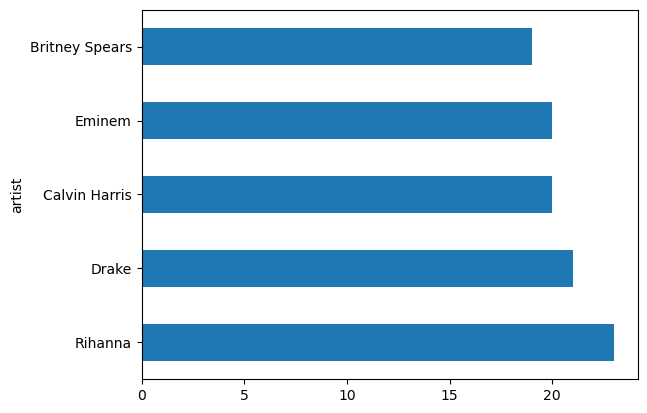

In [443]:
top_five_artists.plot.barh()
plt.show()

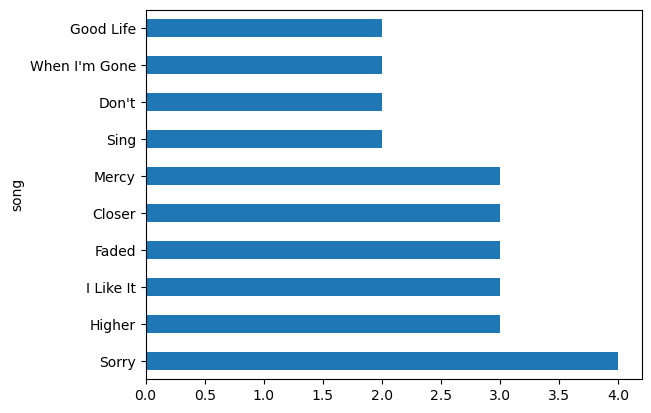

In [444]:
most_popular = df.groupby('song').count().sort_values(by = 'popularity', ascending=False)['popularity'][:10]
most_popular.plot.barh()
plt.show()

In [445]:
top = df[['song', 'popularity']].sort_values(by='popularity', ascending = False)[:10]
top

,song,popularity
1278,Sweater Weather,89
1267,Another Love,88
198,Without Me,87
1750,lovely (with Khalid),86
1555,Wait a Minute!,86
6,The Real Slim Shady,86
1925,Circles,85
1464,The Nights,85
1462,Daddy Issues,85
1641,Perfect,85


In [446]:
#def onehot_encode(df, column, prefix):
 #   df = df.copy()
 #   dummies = pd.get_dummies(df[column], prefix=prefix)
 #   df = pd.concat([df, dummies], axis=1)
 #   df = df.drop(column, axis=1)
 #   return df

In [408]:
#df = onehot_encode(df, 'genre','Genre')
#df = onehot_encode(df, 'artist','Genre')

KeyError: 'genre'